In [1]:
!pip install gdown

In [2]:
from google.colab import drive
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

# Step 1: File Upload

### 1.1 CSV dataset to pd dataframe upload

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Spotify_data V1.xlsx - Sheet1.csv')
#df = pd.read_csv('/content/Spotify_data V1.xlsx - Sheet1.csv')
df

Mounted at /content/drive


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


### 1.2 Create prices per plan dataframe

In [4]:
# add prices dataframe
price_per_plan = {'Plan': ['Family Plan-Rs', 'Individual Plan- Rs', 'Student Plan-Rs', 'Duo Plan-Rs', None],
                  'Cost': [16.99, 10.99, 5.99, 14.99, 0.00]}

pod_rating_num = {'pod_variety_satisfaction': ['Very Satisfied', 'Satisfied', 'Ok', 'Dissatisfied', 'Very Dissatisfied'],
                  'Rating': [5, 4, 3, 2, 1]}
#df['pod_ratings'] = df['pod_variety_satisfaction'].map(pod_rating_num)


pod_df= pd.DataFrame(pod_rating_num)
pod_df


price_df = pd.DataFrame(price_per_plan)
price_df



,Plan,Cost
0,Family Plan-Rs,16.99
1,Individual Plan- Rs,10.99
2,Student Plan-Rs,5.99
3,Duo Plan-Rs,14.99
4,None,0.00


### 1.3 Merge prices and target dataframe

In [5]:
df = df.merge(price_df.rename(columns={'Cost': 'price_preferred_premium_plan'}), left_on='preffered_premium_plan', right_on='Plan', how='left')
df = df.merge(pod_df.rename(columns={'Ratings': 'pod_ratings'}))
df.drop(columns=['Plan'], inplace=True)   # get rid of Plan column
# move price_preferred_premium_plan to be the 8th column)
col = df.pop('price_preferred_premium_plan')
df.insert(7, 'price_preferred_premium_plan', col)
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,price_preferred_premium_plan,preferred_listening_content,fav_music_genre,...,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,Rating
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs,16.99,Podcast,Melody,...,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok,3
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs,10.99,Podcast,Rap,...,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied,4
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs,5.99,Podcast,Pop,...,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied,4
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,0.00,Music,Melody,...,"Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok,3
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,0.00,Music,Melody,...,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs,5.99,Music,Pop,...,While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok,3
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs,5.99,Music,Pop,...,"While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok,3
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs,5.99,Music,Pop,...,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok,3
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs,10.99,Music,Melody,...,"Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied,4


## Step 2: Data Cleaning

### 2.1 Remove Null Values

In [6]:
# replace 'NaN' values with 'None'
df.replace('NaN', 'None', inplace=True)
df.replace(np.nan, 'None', inplace=True)

df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,price_preferred_premium_plan,preferred_listening_content,fav_music_genre,...,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,Rating
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs,16.99,Podcast,Melody,...,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok,3
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs,10.99,Podcast,Rap,...,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied,4
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs,5.99,Podcast,Pop,...,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied,4
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,0.0,Music,Melody,...,"Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok,3
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,0.0,Music,Melody,...,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs,5.99,Music,Pop,...,While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok,3
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs,5.99,Music,Pop,...,"While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok,3
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs,5.99,Music,Pop,...,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok,3
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs,10.99,Music,Melody,...,"Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied,4


### 2.2 One Hot Encode Categorical Features

In [7]:

def one_hot_encode_list(df, column, delimiters):
    # Combine delimiters into a single regex pattern
    pattern = '|'.join(map(re.escape, delimiters))

    # Create a count of items in each row based on the delimiters
    df[f'{column}_count'] = df[column].str.split(pattern).str.len()

    # Create dummy variables for unique options in the column
    frequencies = df[column].str.split(pattern).explode().str.strip()  # Separate and clean items
    unique_options = list(filter(lambda x: x != '', frequencies.unique().tolist()))  # Filter out empty strings

    # Create dummy DataFrame with prefixed column names
    dummy_df = df[column].str.get_dummies(sep=pattern).reindex(columns=unique_options, fill_value=0)
    dummy_df = dummy_df.rename(columns=lambda x: f"{column}_{x}")

    # Join dummy DataFrame to the original DataFrame
    df = df.join(dummy_df)
    df.drop(columns=[column], inplace=True)  # Drop the original column
    return df

df_new = one_hot_encode_list(df, 'music_lis_frequency', [',', ' or ', ' and '])
df_new = one_hot_encode_list(df_new, 'music_Influencial_mood', [',', ' or ', ' and '])
df_new = one_hot_encode_list(df_new, 'music_expl_method', [',', ' or ', ' and '])
df_new = one_hot_encode_list(df_new, 'spotify_listening_device', [',', ' or ', ' and '])


df_new.head()

,Age,Gender,spotify_usage_period,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,price_preferred_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,...,music_expl_method_Social media,music_expl_method_Friends,music_expl_method_Search,spotify_listening_device_count,spotify_listening_device_Smart speakers,spotify_listening_device_voice assistants,spotify_listening_device_Computer,spotify_listening_device_laptop,spotify_listening_device_Smartphone,spotify_listening_device_Wearable devices
0,20-35,Female,More than 2 years,Free (ad-supported),Yes,Family Plan-Rs,16.99,Podcast,Melody,Night,...,0,0,0,2,0,0,0,0,0,0
1,12-20,Male,More than 2 years,Free (ad-supported),Yes,Individual Plan- Rs,10.99,Podcast,Rap,Afternoon,...,0,0,0,2,0,0,0,0,0,0
2,35-60,Others,6 months to 1 year,Free (ad-supported),Yes,Student Plan-Rs,5.99,Podcast,Pop,Night,...,0,0,0,2,0,0,0,0,0,0
3,20-35,Female,1 year to 2 years,Free (ad-supported),No,None,0.0,Music,Melody,Night,...,0,0,0,3,0,0,0,0,0,0
4,20-35,Female,1 year to 2 years,Free (ad-supported),No,None,0.0,Music,Melody,Night,...,0,0,0,1,0,0,0,0,0,0


In [8]:
# check if df_new has nan values
df_new.isna().sum()

,0
Age,0
Gender,0
spotify_usage_period,0
spotify_subscription_plan,0
premium_sub_willingness,0
preffered_premium_plan,0
price_preferred_premium_plan,0
preferred_listening_content,0
fav_music_genre,0
music_time_slot,0


In [9]:
# used to one hot encode categorical data with one unique value
def one_hot_encode_unique(df, column):
    dummies = pd.get_dummies(df[column], prefix=column).astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

df_new = one_hot_encode_unique(df_new, 'Age')
df_new = one_hot_encode_unique(df_new, 'Gender')
df_new = one_hot_encode_unique(df_new, 'spotify_usage_period')
df_new = one_hot_encode_unique(df_new, 'preferred_listening_content')
df_new = one_hot_encode_unique(df_new, 'fav_music_genre')
df_new = one_hot_encode_unique(df_new, 'music_time_slot')
df_new = one_hot_encode_unique(df_new, 'pod_lis_frequency')
df_new = one_hot_encode_unique(df_new, 'fav_pod_genre')
df_new = one_hot_encode_unique(df_new, 'preffered_pod_format')
df_new = one_hot_encode_unique(df_new, 'pod_host_preference')
df_new = one_hot_encode_unique(df_new, 'preffered_pod_duration')
df_new = one_hot_encode_unique(df_new, 'pod_variety_satisfaction')

df_new

,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,price_preferred_premium_plan,music_recc_rating,Rating,music_lis_frequency_count,music_lis_frequency_leisure time,music_lis_frequency_Workout session,music_lis_frequency_Study Hours,...,pod_host_preference_unknown Podcasters,preffered_pod_duration_Both,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter,pod_variety_satisfaction_Dissatisfied,pod_variety_satisfaction_Ok,pod_variety_satisfaction_Satisfied,pod_variety_satisfaction_Very Dissatisfied,pod_variety_satisfaction_Very Satisfied
0,Free (ad-supported),Yes,Family Plan-Rs,16.99,3,3,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,Free (ad-supported),Yes,Individual Plan- Rs,10.99,2,4,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,Free (ad-supported),Yes,Student Plan-Rs,5.99,4,4,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,Free (ad-supported),No,None,0.0,4,3,3,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,Free (ad-supported),No,None,0.0,4,3,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Free (ad-supported),Yes,Student Plan-Rs,5.99,5,3,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
516,Free (ad-supported),Yes,Student Plan-Rs,5.99,2,3,3,0,0,0,...,0,0,0,0,1,0,1,0,0,0
517,Free (ad-supported),No,Student Plan-Rs,5.99,3,3,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
518,Premium (paid subscription),Yes,Individual Plan- Rs,10.99,2,4,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Step 3: Exploritory Data Analysis

In [10]:
df_new_free = df_new.copy()
df_new_free = df_new[df_new['spotify_subscription_plan'] == 'Free (ad-supported)']
display(df_new_free)

,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,price_preferred_premium_plan,music_recc_rating,Rating,music_lis_frequency_count,music_lis_frequency_leisure time,music_lis_frequency_Workout session,music_lis_frequency_Study Hours,...,pod_host_preference_unknown Podcasters,preffered_pod_duration_Both,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter,pod_variety_satisfaction_Dissatisfied,pod_variety_satisfaction_Ok,pod_variety_satisfaction_Satisfied,pod_variety_satisfaction_Very Dissatisfied,pod_variety_satisfaction_Very Satisfied
0,Free (ad-supported),Yes,Family Plan-Rs,16.99,3,3,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,Free (ad-supported),Yes,Individual Plan- Rs,10.99,2,4,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,Free (ad-supported),Yes,Student Plan-Rs,5.99,4,4,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,Free (ad-supported),No,None,0.0,4,3,3,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,Free (ad-supported),No,None,0.0,4,3,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Free (ad-supported),No,None,0.0,4,3,3,0,0,0,...,0,0,0,1,0,0,1,0,0,0
514,Free (ad-supported),No,None,0.0,4,4,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
515,Free (ad-supported),Yes,Student Plan-Rs,5.99,5,3,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
516,Free (ad-supported),Yes,Student Plan-Rs,5.99,2,3,3,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Number of people willing to subscribe to premium: 114
Number of people willing to not subscribe to premium: 310


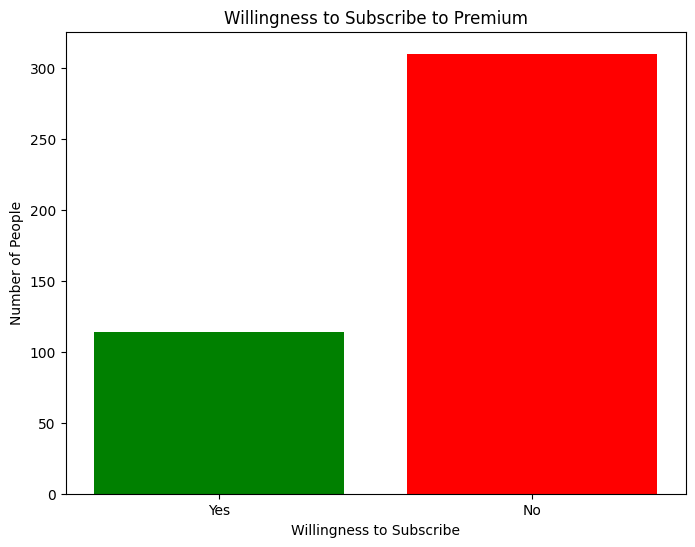

In [11]:
from collections import Counter

counter = Counter()
willing_to_subscribe = df_new_free[df_new_free['premium_sub_willingness'] == 'Yes'].shape[0]
willing_to_not_subscribe = df_new_free[df_new_free['premium_sub_willingness'] == 'No'].shape[0]
print(f'Number of people willing to subscribe to premium: {willing_to_subscribe}')
print(f'Number of people willing to not subscribe to premium: {willing_to_not_subscribe}')

plt.figure(figsize=(8, 6))
plt.bar(['Yes', 'No'], [willing_to_subscribe, willing_to_not_subscribe], color=['green', 'red'])
plt.xlabel('Willingness to Subscribe')
plt.ylabel('Number of People')
plt.title('Willingness to Subscribe to Premium')
plt.show()

Our data is not balanaced: there are many more people that are not willing to subscribe out of the people currenlty on the free plan than people who are willing to subscribe.

Text(0.5, 1.0, 'Gender and Age Demographic')

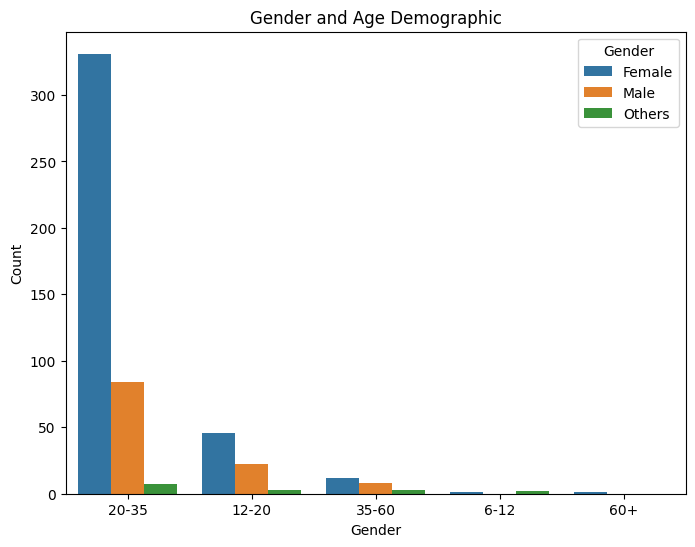

In [12]:
# plot gender and age demographic
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Age Demographic')

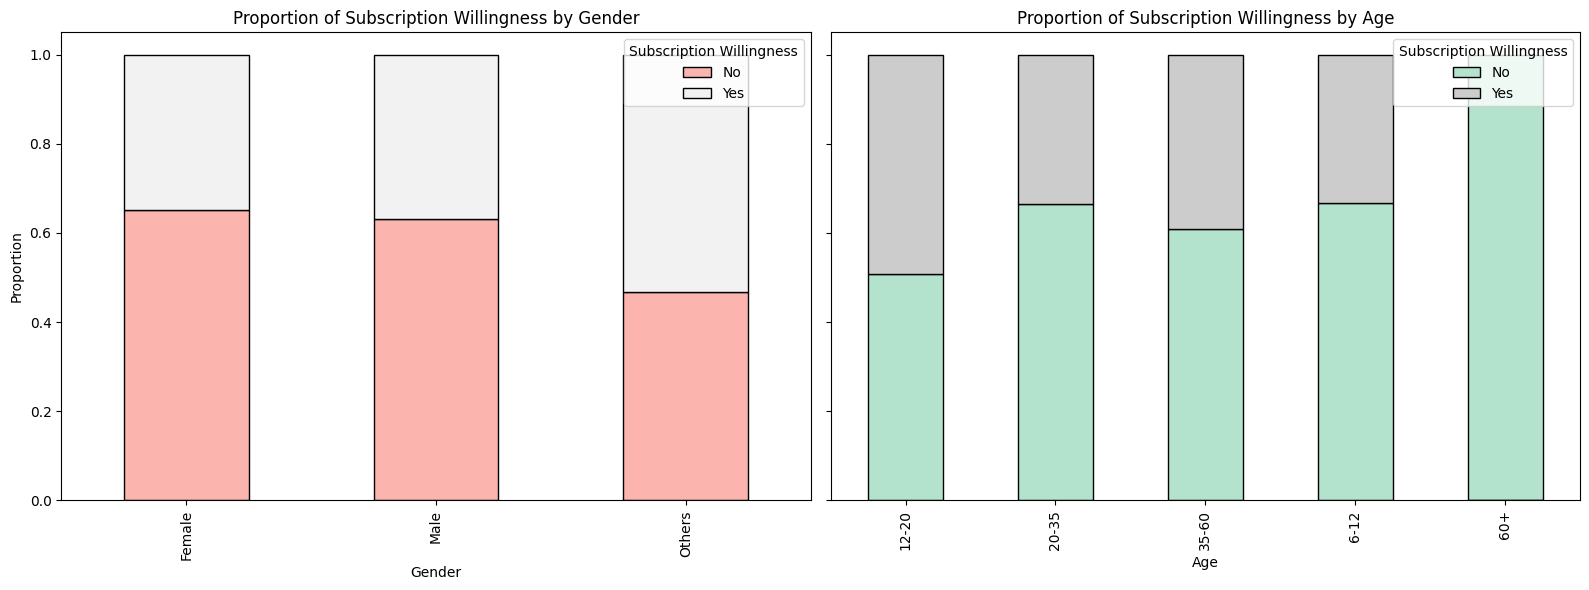

In [13]:
# because the gender and age data is unbalanced we want to represent the difference in subscription willingness across genders and age
# Calculate the subscription ratios for each gender
gender_subscription_ratio = df.groupby('Gender')['premium_sub_willingness'].value_counts(normalize=True).unstack()

# Calculate the subscription ratios for each age group
age_subscription_ratio = df.groupby('Age')['premium_sub_willingness'].value_counts(normalize=True).unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for gender
gender_subscription_ratio.plot(kind='bar', stacked=True, colormap="Pastel1", edgecolor="black", ax=axes[0])
axes[0].set_title('Proportion of Subscription Willingness by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].legend(title="Subscription Willingness")

# Plot for age
age_subscription_ratio.plot(kind='bar', stacked=True, colormap="Pastel2", edgecolor="black", ax=axes[1])
axes[1].set_title('Proportion of Subscription Willingness by Age')
axes[1].set_xlabel('Age')
axes[1].legend(title="Subscription Willingness")

plt.tight_layout()
plt.show()

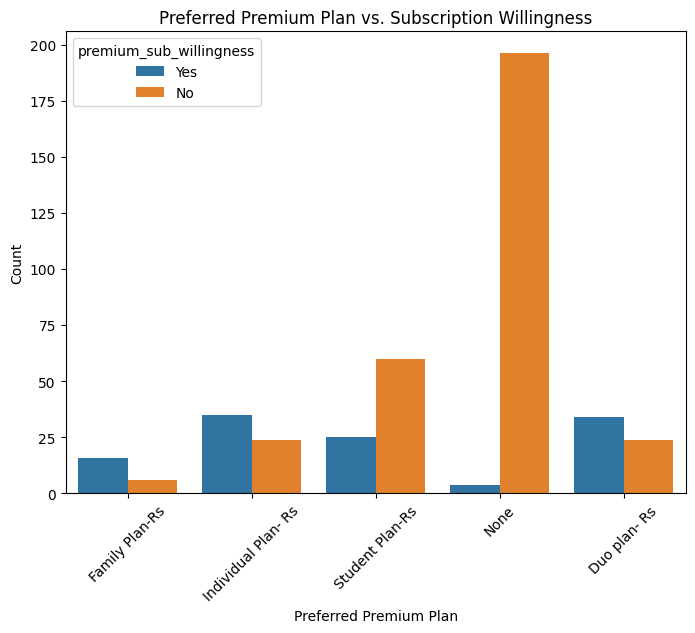

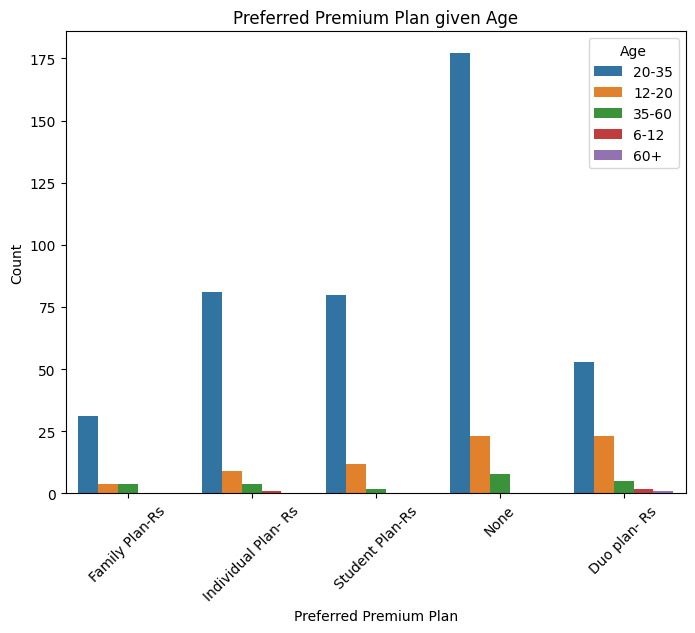

In [14]:
# plot perfered premium plan against if they are currently subscribed or not
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new_free, x='preffered_premium_plan', hue='premium_sub_willingness')
plt.xlabel('Preferred Premium Plan')
plt.ylabel('Count')
plt.title('Preferred Premium Plan vs. Subscription Willingness')
plt.xticks(rotation=45)
plt.show()

# plot perfered premium plan in relation to age
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='preffered_premium_plan', hue='Age')
plt.xlabel('Preferred Premium Plan')
plt.ylabel('Count')
plt.title('Preferred Premium Plan given Age')
plt.xticks(rotation=45)
plt.show()

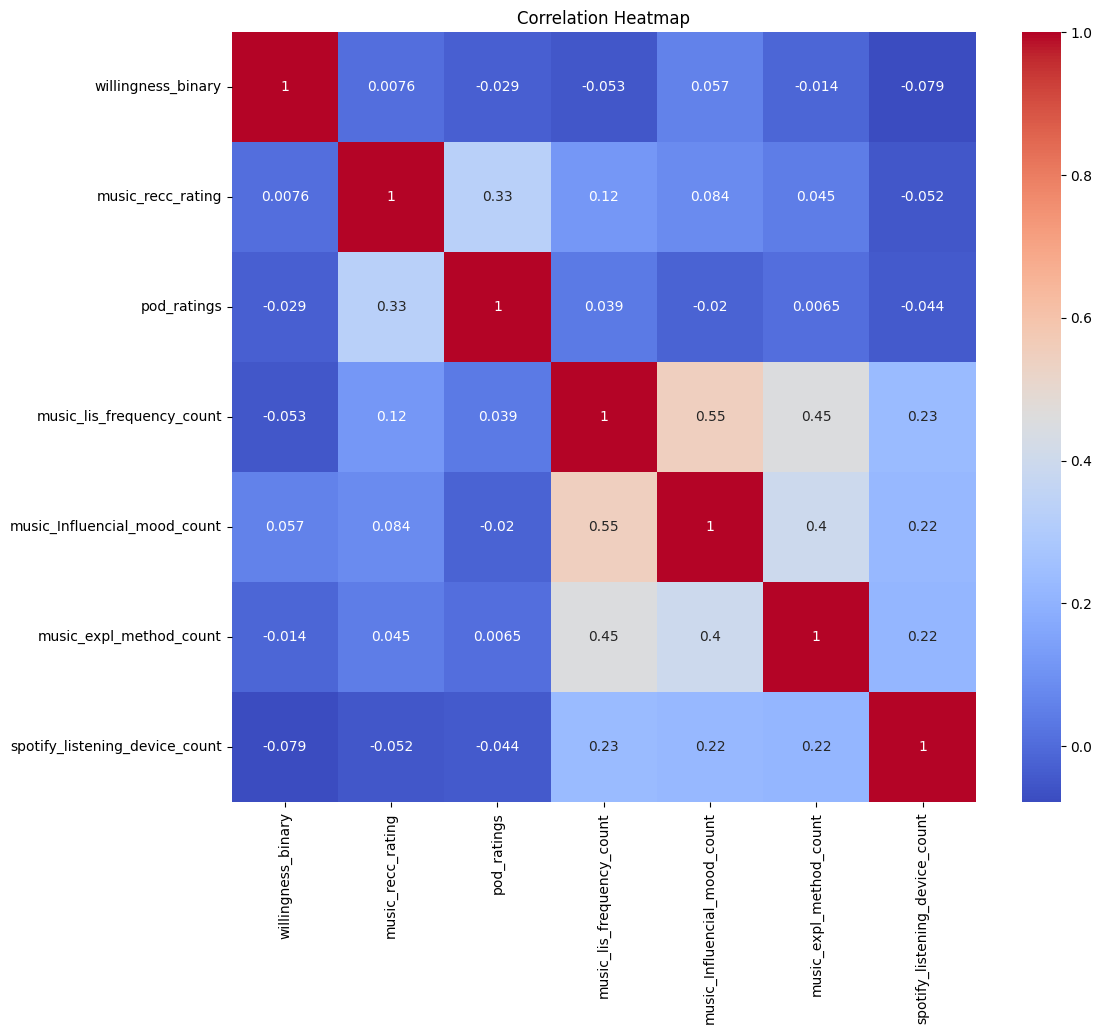

,willingness_binary,music_recc_rating,pod_ratings,music_lis_frequency_count,music_Influencial_mood_count,music_expl_method_count,spotify_listening_device_count
0,1,3.0,3.0,1.0,2.0,1.0,2.0
1,1,2.0,4.0,1.0,2.0,1.0,2.0
2,1,4.0,4.0,2.0,2.0,1.0,2.0
3,0,4.0,3.0,3.0,4.0,2.0,3.0
4,0,4.0,3.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...
419,0,4.0,4.0,3.0,2.0,2.0,1.0
420,0,3.0,4.0,1.0,2.0,1.0,1.0
421,1,1.0,1.0,1.0,2.0,1.0,1.0
422,1,3.0,3.0,3.0,2.0,2.0,1.0


In [15]:
# Heat map of correlation between all features
df_heatmap = pd.DataFrame()
df_heatmap['willingness_binary'] = np.where(df_new_free['premium_sub_willingness'] == 'Yes', 1, 0)
df_heatmap['music_recc_rating'] = df_new_free['music_recc_rating']
df_heatmap['pod_ratings'] = df_new_free['Rating']

#df_heatmap = pd.DataFrame()

plt.figure(figsize=(12, 10))
# Select columns that end with "_end"
selected_columns = df_new_free.filter(regex='_count').columns  # Get the column names instead of the data
df_heatmap[selected_columns] = df_new_free[selected_columns]

sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

display(df_heatmap)

In [16]:
# music reccomendation ratings have a postitive correlation with willingness to subscribe but it's very small
# Plot how podcast satisfaction impacts willingness


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_classification(y_valid, y_pred):
    """
    Compute and print precision, recall, F1 score, and accuracy for a classification model.

    Parameters:
    y_valid (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    dict: A dictionary containing the computed metrics.
    """
    precision = precision_score(y_valid, y_pred, average='weighted')
    recall = recall_score(y_valid, y_pred, average='weighted')
    f1 = f1_score(y_valid, y_pred, average='weighted')
    accuracy = accuracy_score(y_valid, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(actual_values, predicted_values, plot_title="Comparison of Actual vs Predicted"):
    """
    This function takes actual and predicted values, compares their distributions
    for each category, and plots side-by-side bar charts to visualize the counts.

    Parameters:
    actual_values (array-like): The actual values (ground truth) for the classification task.
    predicted_values (array-like): The predicted values for the classification task.
    plot_title (str): Title for the plot (default is "Comparison of Actual vs Predicted").
    """
    # Create a DataFrame to store actual vs predicted values
    df_comparison = pd.DataFrame({
        'Actual': actual_values,
        'Predicted': predicted_values
    })

    # Drop any rows where 'Actual' or 'Predicted' are NaN
    df_comparison = df_comparison.dropna(subset=['Actual', 'Predicted'])

    # Ensure that the column names are unique if there are any duplicates
    if df_comparison['Actual'].duplicated().any():
        df_comparison['Actual'] = df_comparison['Actual'].astype(str)
    if df_comparison['Predicted'].duplicated().any():
        df_comparison['Predicted'] = df_comparison['Predicted'].astype(str)

    # Create a DataFrame for the counts of actual vs predicted values for each plan
    actual_counts = df_comparison.groupby(['Actual']).size().reset_index(name='Count')
    predicted_counts = df_comparison.groupby(['Predicted']).size().reset_index(name='Count')

    # Add a new column to label them as 'Actual' or 'Predicted'
    actual_counts['Type'] = 'Actual'
    predicted_counts['Type'] = 'Predicted'

    # Merge the actual and predicted counts into one DataFrame for plotting
    df_counts = pd.concat([actual_counts, predicted_counts], axis=0)

    # Plotting the bar chart using Seaborn with side-by-side bars
    plt.figure(figsize=(10, 6))

    # Seaborn barplot with dodge=True ensures side-by-side bars
    sns.barplot(x='Actual', y='Count', hue='Type', data=df_counts, dodge=True)

    # Add titles and labels
    plt.title(plot_title, fontsize=16)
    plt.xlabel('Preferred Premium Plan',fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.xticks(rotation=0,fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    plt.legend(title='Legend', loc='upper left',fontsize=14)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels, cmap='Blues', use_seaborn=False, title="Confusion Matrix"):
    """
    Plots a confusion matrix for a classification model.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        labels (array-like): List of class labels.
        cmap (str): Colormap for the plot (default is 'Blues').
        use_seaborn (bool): If True, uses seaborn for visualization; otherwise, sklearn.
        title (str): Title of the plot.

    Returns:
        None
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if use_seaborn:
        # Option 1: Seaborn visualization
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.xticks(rotation=45)  # Rotate and adjust spacing
        plt.title(title)
        plt.show()
    else:
        # Option 2: Sklearn visualization
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=cmap)
        plt.title(title)
        plt.show()


#Step 4: Logistic Regression

### 4.1 Split Dataset

In [20]:
df_new_free.drop(columns=['Rating'])
X = df_new_free.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y = df_new_free['premium_sub_willingness']


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

### 4.2

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_valid)
print(classification_report(y_valid,y_pred))

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_valid, y_valid)
print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

              precision    recall  f1-score   support

          No       0.80      0.97      0.87        61
         Yes       0.82      0.38      0.51        24

    accuracy                           0.80        85
   macro avg       0.81      0.67      0.69        85
weighted avg       0.80      0.80      0.77        85

Training Score: 0.8141592920353983
Testing Score: 0.8


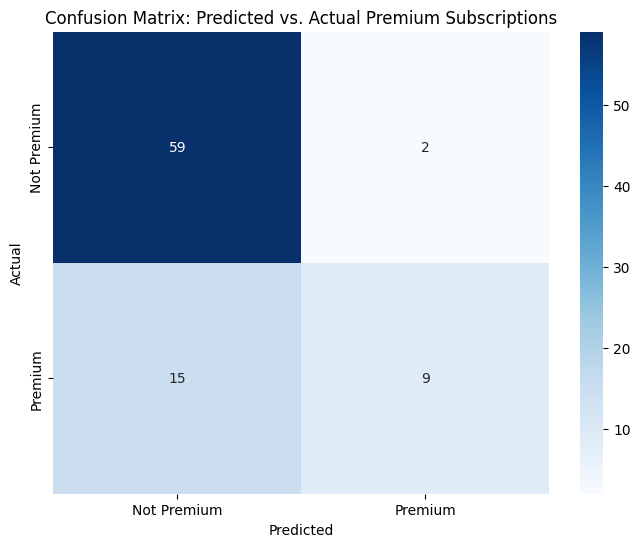

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Premium', 'Premium'], yticklabels=['Not Premium', 'Premium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Predicted vs. Actual Premium Subscriptions')
plt.show()


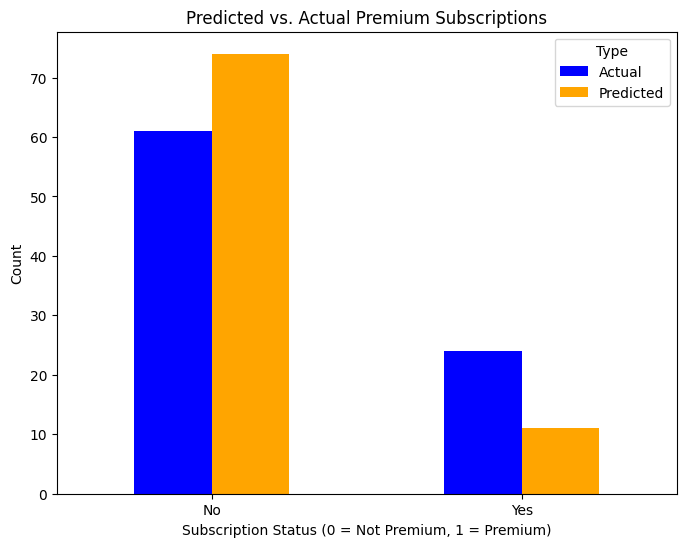

In [23]:
import pandas as pd
import numpy as np

# Aggregate counts for actual and predicted
actual_counts = pd.Series(y_valid).value_counts(sort=False)
predicted_counts = pd.Series(y_pred).value_counts(sort=False)

# Create a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).sort_index()

# Plot bar chart
comparison_df.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.xlabel('Subscription Status (0 = Not Premium, 1 = Premium)')
plt.ylabel('Count')
plt.title('Predicted vs. Actual Premium Subscriptions')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.show()


In [24]:
###  BALANCED LOGISITIC REGRESSION MODEL

logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train,y_train)
y_pred = logreg_balanced.predict(X_valid)
print(classification_report(y_valid,y_pred))

train_score_balanced = logreg_balanced.score(X_train, y_train)
test_score_balanced = logreg_balanced.score(X_valid, y_valid)
print(f"Training Score: {train_score_balanced}")
print(f"Testing Score: {test_score_balanced}")
print(evaluate_classification(y_valid, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.74      0.78        61
         Yes       0.48      0.62      0.55        24

    accuracy                           0.71        85
   macro avg       0.66      0.68      0.66        85
weighted avg       0.73      0.71      0.72        85

Training Score: 0.7256637168141593
Testing Score: 0.7058823529411765
Accuracy: 0.71
Precision: 0.73
Recall: 0.71
F1 Score: 0.72
{'accuracy': 0.7058823529411765, 'precision': 0.7346616065781152, 'recall': 0.7058823529411765, 'f1_score': 0.7156475238316671}


Here we can see that the balanced logistic regression model training and test scores are slightly worse than the unbalanced model. This makes sense as we are working with half the data of the people that we are not willing to subscribe

### 4.3

In [25]:
# coeffcients
coefficients = abs(logreg.coef_)
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients[0]})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
coefficients_df

,Feature,Coefficient
75,fav_pod_genre_Finance related and current affairs,0.818417
54,fav_music_genre_Kpop,0.722311
58,fav_music_genre_Rap,0.642976
91,preffered_pod_format_Educational,0.626998
88,fav_pod_genre_Stories,0.556543
...,...,...
18,music_Influencial_mood_Relaxation,0.000000
34,spotify_listening_device_laptop,0.000000
14,music_Influencial_mood_Sadness,0.000000
15,music_Influencial_mood_melancholy,0.000000


In [26]:
betas = pd.Series(logreg.coef_[0], index=X_train.columns)
betas = pd.concat([betas, pd.Series({"Intercept": logreg.intercept_[0]})])
betas = betas.sort_values(ascending=False)
betas

,0
fav_pod_genre_Finance related and current affairs,0.818417
fav_music_genre_Rap,0.642976
preffered_pod_format_Educational,0.626998
fav_pod_genre_Stories,0.556543
pod_lis_frequency_Once a week,0.481283
...,...
preffered_pod_format_Conversational,-0.397631
spotify_usage_period_Less than 6 months,-0.468665
pod_host_preference_Both,-0.472962
fav_music_genre_Kpop,-0.722311


# Step 5: Gradient Boosting


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute class weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_gradBoost = gb.predict(X_valid)

## ADD Training accuracy
train_score_gb = gb.score(X_train, y_train)
print(f"Training Score: {train_score_gb}")

print(classification_report(y_valid,y_pred_gradBoost))
print(evaluate_classification(y_valid, y_pred_gradBoost))

Training Score: 0.911504424778761
              precision    recall  f1-score   support

          No       0.80      0.77      0.78        61
         Yes       0.46      0.50      0.48        24

    accuracy                           0.69        85
   macro avg       0.63      0.64      0.63        85
weighted avg       0.70      0.69      0.70        85

Accuracy: 0.69
Precision: 0.70
Recall: 0.69
F1 Score: 0.70
{'accuracy': 0.6941176470588235, 'precision': 0.7020016872459545, 'recall': 0.6941176470588235, 'f1_score': 0.6976862745098038}


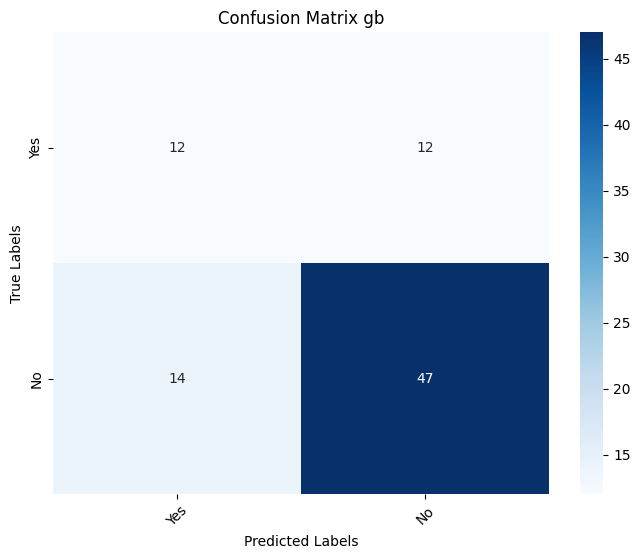

In [29]:
labels = df_new['premium_sub_willingness'].unique()
plot_confusion_matrix(y_valid, y_pred_gradBoost, labels=labels, cmap='Blues', use_seaborn=True, title="Confusion Matrix gb")

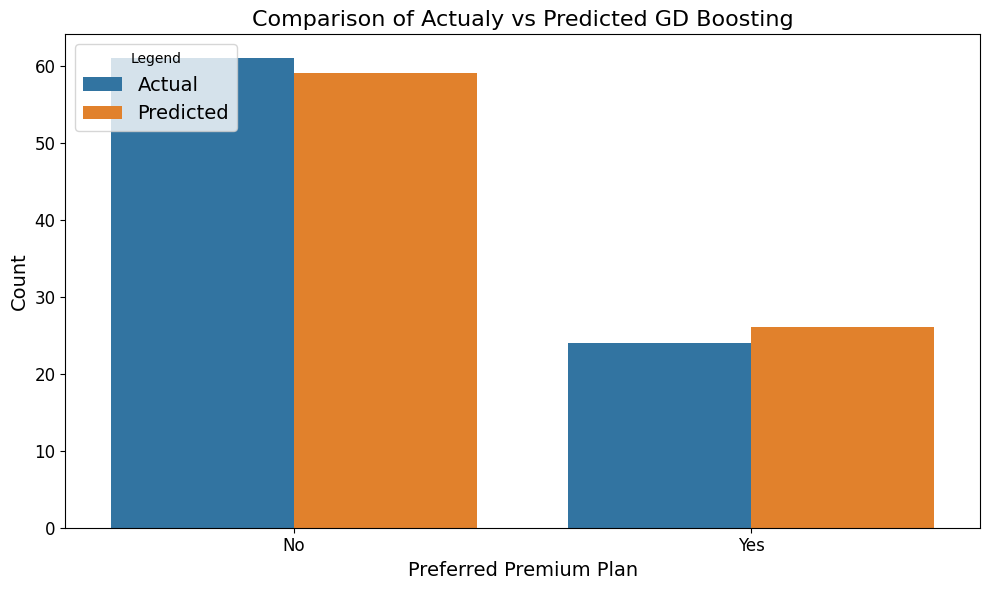

In [30]:
plot_actual_vs_predicted(y_valid, y_pred_gradBoost, "Comparison of Actualy vs Predicted GD Boosting")

##ADABoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost classifier with the base learner
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

ada_boost.fit(X_train, y_train)
# Make predictions on the test set
y_pred_ada = ada_boost.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_ada)
print(f"Accuracy: {accuracy:.4f}")

## ADD Training accuracy
train_score_ada = ada_boost.score(X_train, y_train)
print(f"Training Score: {train_score_ada}")

# Detailed classification report
print(classification_report(y_valid, y_pred_ada))
print(evaluate_classification(y_valid, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8000
Training Score: 0.799410029498525
              precision    recall  f1-score   support

          No       0.81      0.95      0.87        61
         Yes       0.77      0.42      0.54        24

    accuracy                           0.80        85
   macro avg       0.79      0.68      0.71        85
weighted avg       0.80      0.80      0.78        85

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.78
{'accuracy': 0.8, 'precision': 0.7952991452991454, 'recall': 0.8, 'f1_score': 0.7785409469619996}


###ROC Curves

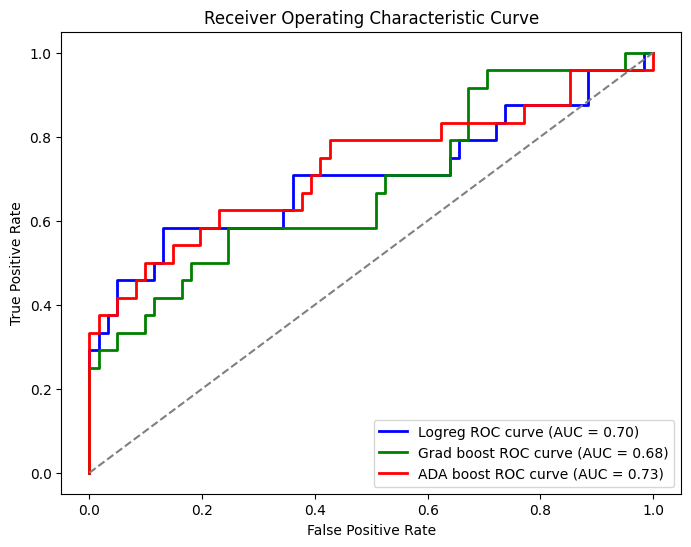

In [32]:
from sklearn.metrics import roc_curve, auc

y_valid_numeric = [1 if label == 'Yes' else 0 for label in y_valid]

y_pred_prob_lr = logreg.predict_proba(X_valid)[:, 1]
y_pred_prob_gb = gb.predict_proba(X_valid)[:, 1]
y_pred_prob_ada = ada_boost.predict_proba(X_valid)[:, 1]

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_valid_numeric, y_pred_prob_lr, pos_label=1)
lr_roc_auc = auc(lr_fpr, lr_tpr)

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_valid_numeric, y_pred_prob_gb, pos_label=1)
gb_roc_auc = auc(gb_fpr, gb_tpr)

ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_valid_numeric, y_pred_prob_ada, pos_label=1)
ada_roc_auc = auc(ada_fpr, ada_tpr)

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'Logreg ROC curve (AUC = {lr_roc_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, color='green', lw=2, label=f'Grad boost ROC curve (AUC = {gb_roc_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, color='red', lw=2, label=f'ADA boost ROC curve (AUC = {ada_roc_auc:.2f})')

# Plot a diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

#Perfered Premium Plan Models

###evaluation metrics

##Multiclass Logistic Regression

In [33]:
# make a multiclass logistic regression model to predict perffereed premium plan
X_mlr = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y_mlr = df_new['preffered_premium_plan']

X_train_mlr1, X_valid_mlr1, y_train_mlr1, y_valid_mlr1 = train_test_split(X_mlr, y_mlr, test_size=0.2)

multi_logreg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42, class_weight = 'balanced')
multi_logreg.fit(X_train_mlr1, y_train_mlr1)
y_pred_mlr1 = multi_logreg.predict(X_valid_mlr1)

train_score_mlr1 = multi_logreg.score(X_train_mlr1, y_train_mlr1)
print(f"Training Score: {train_score_mlr1}")
test_metrics_mlr = evaluate_classification(y_valid_mlr1, y_pred_mlr1)

Training Score: 0.5264423076923077
Accuracy: 0.27
Precision: 0.30
Recall: 0.27
F1 Score: 0.28


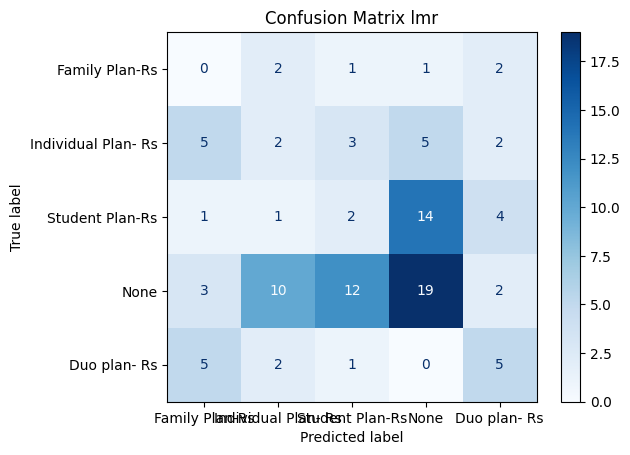

In [34]:
labels = df_new['preffered_premium_plan'].unique()
labels
plot_confusion_matrix(y_valid_mlr1, y_pred_mlr1, labels, cmap='Blues', use_seaborn=False, title="Confusion Matrix lmr")

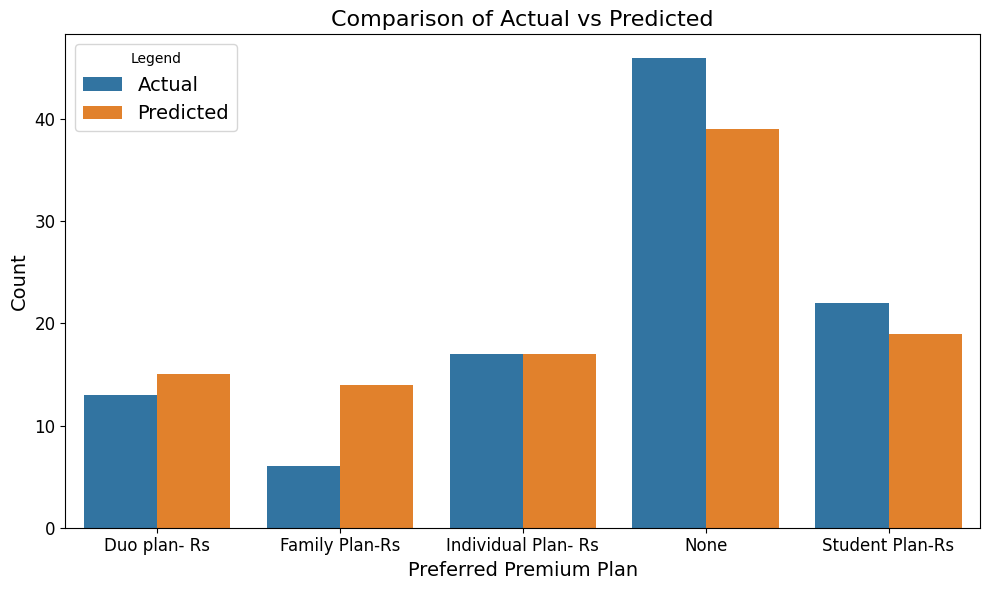

In [35]:
plot_actual_vs_predicted(y_valid_mlr1, y_pred_mlr1)

##Decision Tree

In [36]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

X_dec = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y_dec = df_new['preffered_premium_plan']

X_train_dec, X_valid_dec, y_train_dec, y_valid_dec = train_test_split(X_dec, y_dec, test_size=0.2)

dec_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dec_tree.fit(X_train_dec, y_train_dec)
y_pred_dec = dec_tree.predict(X_valid_dec)

train_score_dec = dec_tree.score(X_train_dec, y_train_dec)
print(f"Training Score: {train_score_dec}")
test_metrics_mlr = evaluate_classification(y_valid_dec, y_pred_dec)

Training Score: 0.9975961538461539
Accuracy: 0.31
Precision: 0.33
Recall: 0.31
F1 Score: 0.31


##Bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X_bag = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y_bag = df_new['preffered_premium_plan']

# Split into training and validation sets
X_train_bag, X_valid_bag, y_train_bag, y_valid_bag = train_test_split(X_bag, y_bag, test_size=0.2, random_state=42)

# Define the base estimator (decision tree) with class_weight='balanced'
base_estimator = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize the BaggingClassifier with the base estimator
bag_tree = BaggingClassifier(estimator=base_estimator, n_estimators=500, random_state=42, bootstrap=True)

# Fit the Bagging model
bag_tree.fit(X_train_bag, y_train_bag)

# Make predictions
y_pred_bag = bag_tree.predict(X_valid_bag)

# Evaluate model performance
train_score_bag = bag_tree.score(X_train_bag, y_train_bag)
print(f"Training Score: {train_score_bag}")

# Assuming you have a custom evaluation function `evaluate_classification`
test_metrics_mlr = evaluate_classification(y_valid_bag, y_pred_bag)


Training Score: 1.0
Accuracy: 0.44
Precision: 0.37
Recall: 0.44
F1 Score: 0.40


In [38]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report

# # Define features and target
# X_features_cv = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
# y_target_cv = df_new['preffered_premium_plan']

# # Split into training and validation sets
# X_train_cv, X_valid_cv, y_train_cv, y_valid_cv = train_test_split(X_features_cv, y_target_cv, test_size=0.2, random_state=42)

# # Define the base estimator (decision tree) with class_weight='balanced'
# dt_base_estimator_cv = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# # Initialize the BaggingClassifier with the base estimator
# bagging_model_cv = BaggingClassifier(estimator=dt_base_estimator_cv, random_state=42, bootstrap=True)

# # Define the parameter grid to search for the best hyperparameters
# param_grid_cv = {
#     'n_estimators': [100, 200, 500],  # number of trees in the forest
#     'estimator__max_depth': [3, 5, 10, None],  # max depth of each tree
#     'estimator__min_samples_split': [2, 5, 10],  # min samples required to split an internal node
#     'estimator__min_samples_leaf': [1, 2, 4],  # min samples required at a leaf node
#     'bootstrap': [True, False]  # whether to use bootstrap sampling
# }

# # Set up GridSearchCV to perform cross-validation and hyperparameter tuning
# grid_search_cv = GridSearchCV(estimator=bagging_model_cv, param_grid=param_grid_cv, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# # Fit the grid search
# grid_search_cv.fit(X_train_cv, y_train_cv)

# # Best parameters from the grid search
# print(f"Best Parameters: {grid_search_cv.best_params_}")

# # Best model from the grid search
# best_bagging_model_cv = grid_search_cv.best_estimator_

# # Evaluate the model with the best parameters
# y_pred_cv = best_bagging_model_cv.predict(X_valid_cv)

# # Evaluate performance on the validation set
# train_score_cv = best_bagging_model_cv.score(X_train_cv, y_train_cv)
# print(f"Training Score: {train_score_cv}")

# # Classification report for validation data
# print("Classification Report (Validation Set):")
# print(classification_report(y_valid_cv, y_pred_cv))

# # Optionally, you can also evaluate performance on the test set or using other metrics


In [39]:
#print(evaluate_classification(y_valid_cv, y_pred_cv))

##Random Forest



In [40]:
X_rf = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y_rf = df_new['preffered_premium_plan']

X_trainrf, X_validrf, y_trainrf, y_validrf = train_test_split(X_rf, y_rf, test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
# hyper_range = {
#    'max_features' : ['sqrt', 'log2', 0.1, 0.25, 0.5],
#    'max_depth' : range(1, 10)
# }
rand_forest = RandomForestClassifier(random_state=42, class_weight = 'balanced')

# Fit the model
rand_forest.fit(X_trainrf, y_trainrf)
y_pred_rf = rand_forest.predict(X_validrf)

train_score_rf = rand_forest.score(X_trainrf, y_trainrf)
print(f"Training Score: {train_score_rf}")
test_metrics_mlr = evaluate_classification(y_validrf, y_pred_rf)

Training Score: 0.9975961538461539
Accuracy: 0.46
Precision: 0.35
Recall: 0.46
F1 Score: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


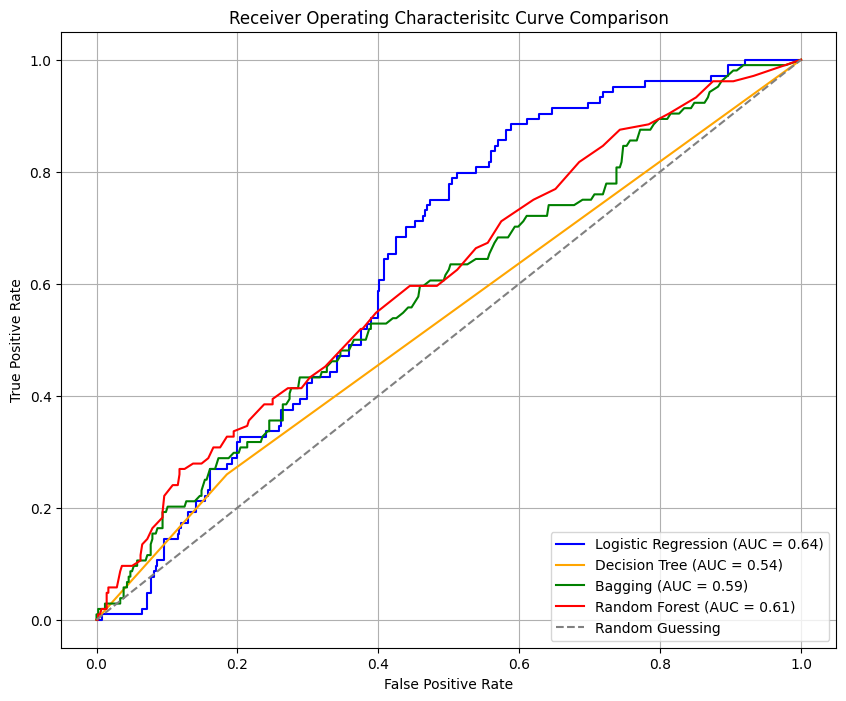

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
y_valid_binary = label_binarize(y_valid_mlr1, classes=multi_logreg.classes_)

# Initialize a dictionary to store results
results = {
    "Logistic Regression": (multi_logreg, X_valid_mlr1),
    "Decision Tree": (dec_tree, X_valid_dec),
    "Bagging": (bag_tree, X_valid_bag),
    "Random Forest": (rand_forest, X_validrf),
}

# Initialize plot
plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'red']
for idx, (name, (model, X_valid)) in enumerate(results.items()):
    # Predict probabilities
    y_score = model.predict_proba(X_valid)

    # Compute micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_valid_binary.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plot micro-average ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[idx])

# Add a diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# Finalize plot
plt.title('Receiver Operating Characterisitc Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [43]:
# X_rf_cv = df_new.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
# y_rf_cv = df_new['preffered_premium_plan']

# X_trainrf_cv, X_validrf_cv, y_trainrf_cv, y_validrf_cv = train_test_split(X_rf, y_rf, test_size=0.2)

In [44]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# import numpy as np


# # Define the model
# rand_forest_cv = RandomForestClassifier(random_state=42, class_weight = 'balanced')


# # Define the hyperparameter ranges
# hyper_range = {
#    'max_features' : ['sqrt', 'log2', 0.1, 0.25, 0.5],
#    'n_estimators' : randint(10, 200)
# }

# random_search = RandomizedSearchCV(
#    rand_forest_cv,
#    param_distributions=hyper_range,
#    n_iter=50,
#    cv=5,
#    verbose=2,
#    random_state=42,
#    n_jobs=-1
# )


# # Fit the model
# random_search.fit(X_trainrf_cv, y_trainrf_cv)

# # best score and the best parameters
# best_score_rand_forest = random_search.best_score_
# best_params_rand_forest = random_search.best_params_

# best_model = random_search.best_estimator_
# # Make predictions using the best model
# y_pred_best = best_model.predict(X_validrf_cv)

# # Evaluate the performance
# metrics_rf_cv = evaluate_classification(y_validrf_cv, y_pred_best)


# print(f"Best n_estimators: {best_params_rand_forest['n_estimators']}, Best Max Features: {best_params_rand_forest['max_features']}, Best Accuracy: {best_score_rand_forest}")


In [45]:
# # Calculate and print the accuracy on the training set
# train_accuracy = random_search.score(X_trainrf_cv, y_trainrf_cv)
# print(f"Training Accuracy: {train_accuracy:.4f}")

# # Calculate and print the accuracy on the test set
# test_accuracy = random_search.score(X_validrf_cv, y_validrf_cv)
# print(f"Test Accuracy: {test_accuracy:.4f}")

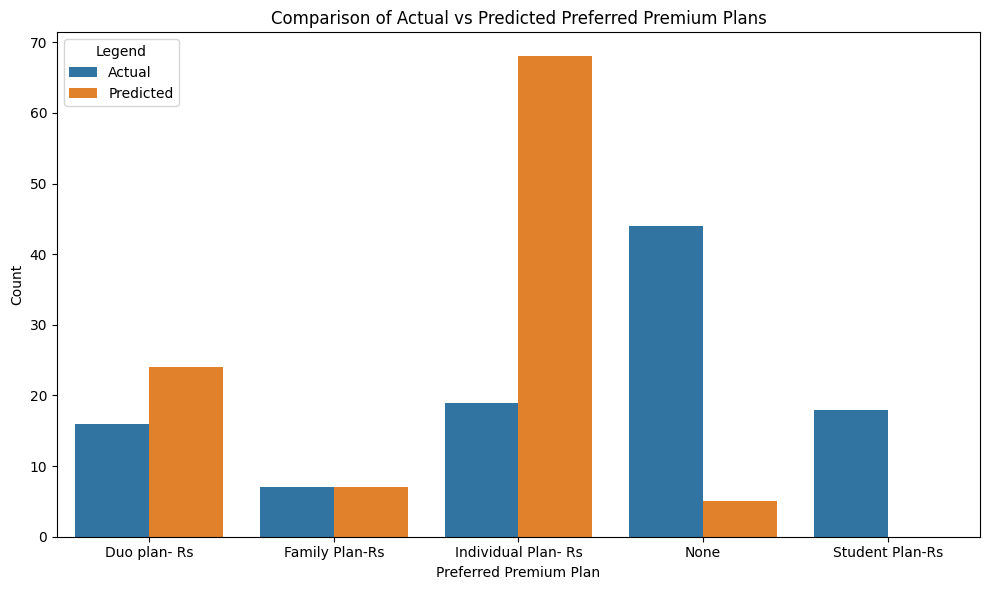

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual vs predicted values
df_comparison = pd.DataFrame({
    'Actual': y_validrf,
    'Predicted': y_pred_rf
})

# Create a DataFrame for the counts of actual vs predicted values for each plan
actual_counts = df_comparison.groupby(['Actual']).size().reset_index(name='Count')
predicted_counts = df_comparison.groupby(['Predicted']).size().reset_index(name='Count')

# Add a new column to label them as 'Actual' or 'Predicted'
actual_counts['Type'] = 'Actual'
predicted_counts['Type'] = 'Predicted'

# Merge the actual and predicted counts into one DataFrame for plotting
df_counts = pd.concat([actual_counts, predicted_counts], axis=0)

# Plotting the bar chart using Seaborn with side-by-side bars
plt.figure(figsize=(10, 6))

# Seaborn barplot with dodge=True ensures side-by-side bars
sns.barplot(x='Actual', y='Count', hue='Type', data=df_counts, dodge=True)

plt.title('Comparison of Actual vs Predicted Preferred Premium Plans')
plt.xlabel('Preferred Premium Plan')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Legend', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


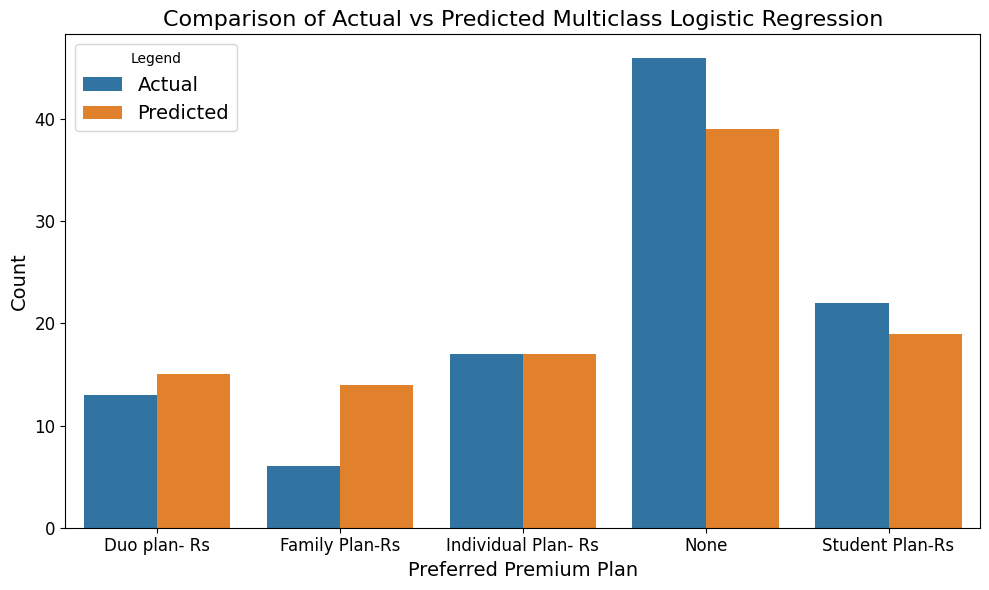

In [47]:
plot_actual_vs_predicted(y_valid_mlr1, y_pred_mlr1, "Comparison of Actual vs Predicted Multiclass Logistic Regression")

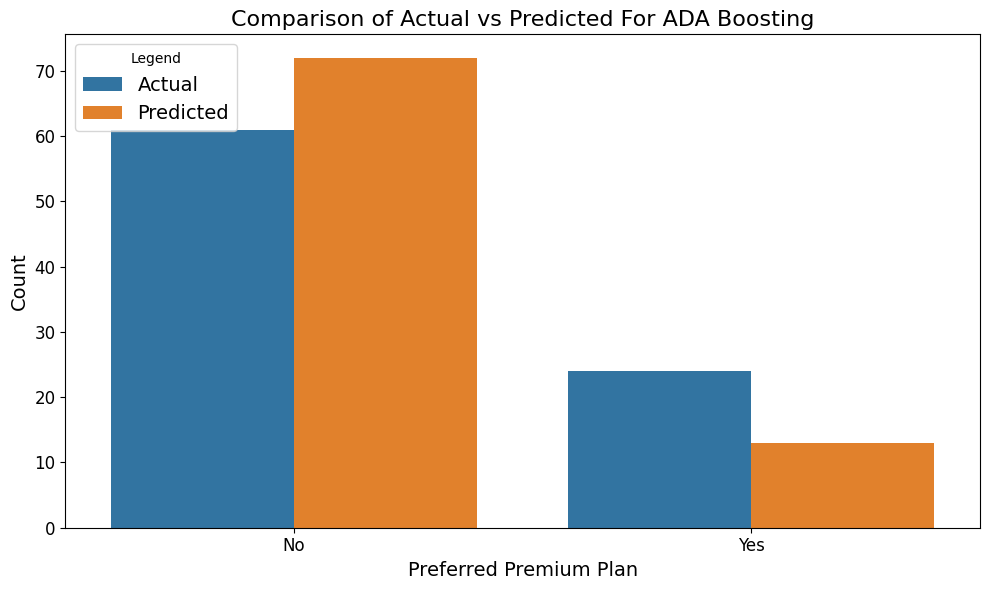

In [48]:
plot_actual_vs_predicted(y_valid, y_pred_ada, "Comparison of Actual vs Predicted For ADA Boosting")

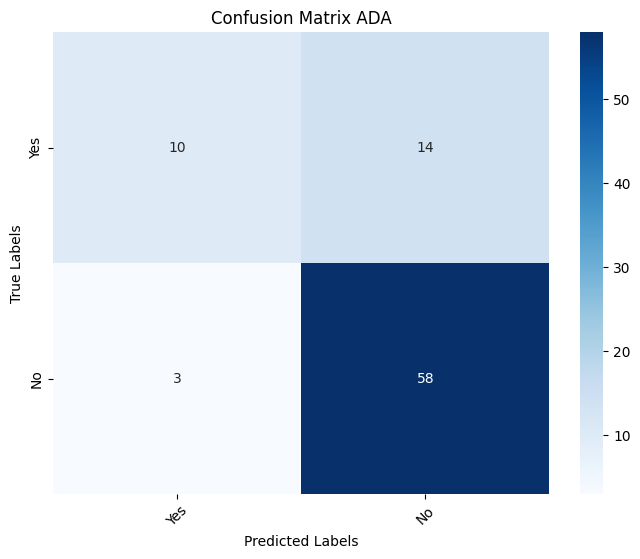

In [49]:
labels = df_new['premium_sub_willingness'].unique()
plot_confusion_matrix(y_valid, y_pred_ada, labels, cmap='Blues', use_seaborn=True, title="Confusion Matrix ADA")

##perfered plan without None as an option

In [50]:
df_will_subscribe = df_new_free.drop(df_new_free[df_new_free['preffered_premium_plan'].isna() | (df_new_free['preffered_premium_plan'] == 'None')].index)

df_will_subscribe.preffered_premium_plan.value_counts()

,count
preffered_premium_plan,
Student Plan-Rs,85
Individual Plan- Rs,59
Duo plan- Rs,58
Family Plan-Rs,22


In [51]:
# make a multiclass logistic regression model to predict perffereed premium plan
X_mlr = df_will_subscribe.drop(columns=['premium_sub_willingness', 'preffered_premium_plan', 'price_preferred_premium_plan', 'spotify_subscription_plan'])
y_mlr = df_will_subscribe['preffered_premium_plan']

X_train_mlr, X_valid_mlr, y_train_mlr, y_valid_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2)

multi_logreg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42, class_weight = 'balanced')
multi_logreg.fit(X_train_mlr, y_train_mlr)
y_pred_mlr = multi_logreg.predict(X_valid_mlr)

train_score_mlr = multi_logreg.score(X_train_mlr, y_train_mlr)
print(f"Training Score: {train_score_mlr}")
test_metrics_mlr = evaluate_classification(y_valid_mlr, y_pred_mlr)

Training Score: 0.7150837988826816
Accuracy: 0.27
Precision: 0.29
Recall: 0.27
F1 Score: 0.27


In [52]:
# print(y_validrf_cv.value_counts())
# print(pd.Series(y_pred_best).value_counts())

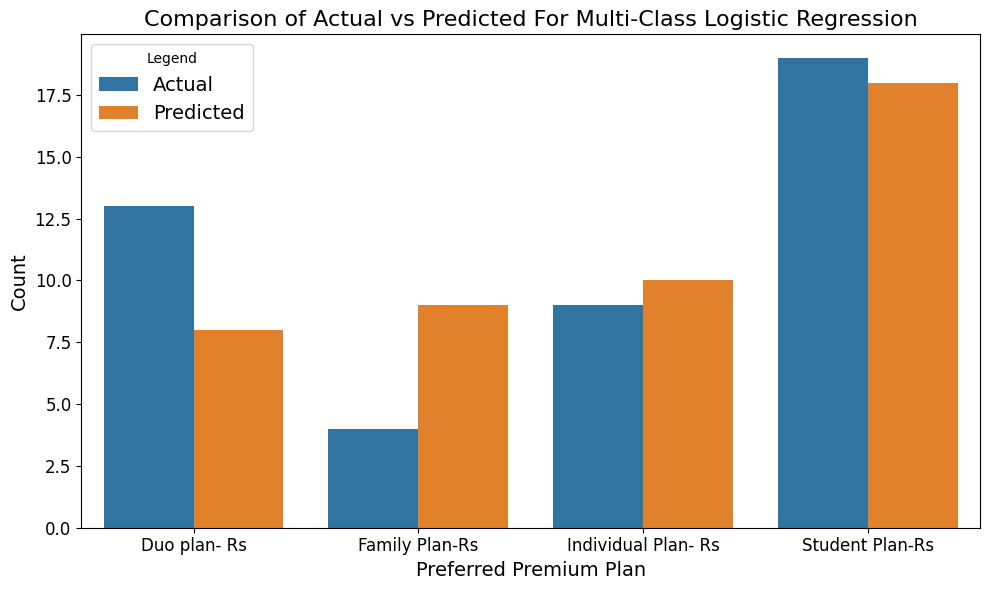

In [53]:
plot_actual_vs_predicted(y_valid_mlr, y_pred_mlr, "Comparison of Actual vs Predicted For Multi-Class Logistic Regression")

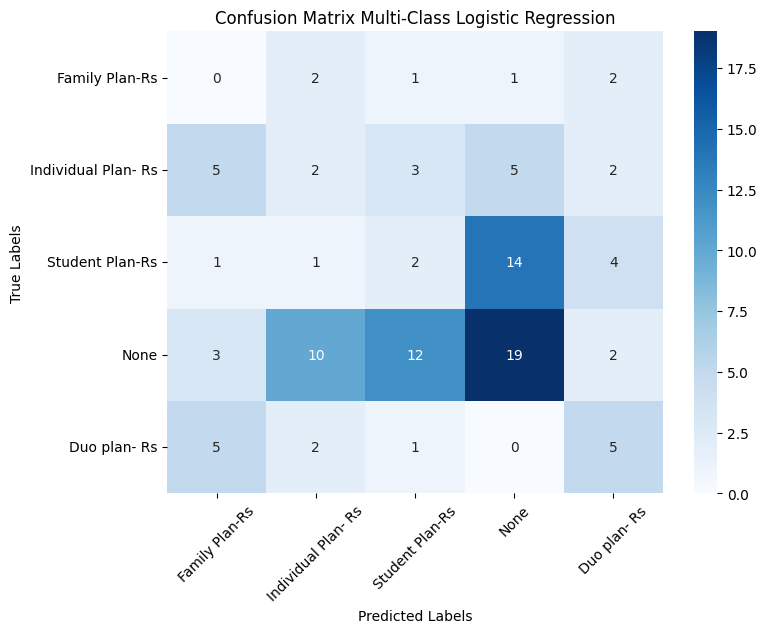

In [54]:
labels = df_new['preffered_premium_plan'].unique()
plot_confusion_matrix(y_valid_mlr1, y_pred_mlr1, labels, cmap='Blues', use_seaborn=True, title="Confusion Matrix Multi-Class Logistic Regression")

In [55]:
display(X_valid)
X_valid.columns

,music_recc_rating,Rating,music_lis_frequency_count,music_lis_frequency_leisure time,music_lis_frequency_Workout session,music_lis_frequency_Study Hours,music_lis_frequency_While Traveling,music_lis_frequency_Office hours,music_lis_frequency_Social gatherings,music_lis_frequency_Night time,...,pod_host_preference_unknown Podcasters,preffered_pod_duration_Both,preffered_pod_duration_Longer,preffered_pod_duration_None,preffered_pod_duration_Shorter,pod_variety_satisfaction_Dissatisfied,pod_variety_satisfaction_Ok,pod_variety_satisfaction_Satisfied,pod_variety_satisfaction_Very Dissatisfied,pod_variety_satisfaction_Very Satisfied
206,4,3,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
256,4,4,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
125,3,2,2,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
287,3,3,3,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
272,1,4,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,4,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
120,5,3,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
333,4,3,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
369,3,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


Index(['music_recc_rating', 'Rating', 'music_lis_frequency_count',
       'music_lis_frequency_leisure time',
       'music_lis_frequency_Workout session',
       'music_lis_frequency_Study Hours',
       'music_lis_frequency_While Traveling',
       'music_lis_frequency_Office hours',
       'music_lis_frequency_Social gatherings',
       'music_lis_frequency_Night time',
       ...
       'pod_host_preference_unknown Podcasters', 'preffered_pod_duration_Both',
       'preffered_pod_duration_Longer', 'preffered_pod_duration_None',
       'preffered_pod_duration_Shorter',
       'pod_variety_satisfaction_Dissatisfied', 'pod_variety_satisfaction_Ok',
       'pod_variety_satisfaction_Satisfied',
       'pod_variety_satisfaction_Very Dissatisfied',
       'pod_variety_satisfaction_Very Satisfied'],
      dtype='object', length=108)

In [56]:
import pandas as pd

# Get the probabilities of subscribing (for class `1`)
y_prob = ada_boost.predict_proba(X_valid) # Probabilities for the positive class (Premium)

list = y_prob
# Convert y_prob (1D array of probabilities for a single class) to a Pandas Series
top_candidates = pd.Series(y_prob[:, 1], index=X_valid.index).sort_values(ascending=False)



# Create a DataFrame to organize predictions
top_candidates_df = pd.DataFrame({
    'Actual': y_valid,
    'Predicted Probability': top_candidates.values
}, index=X_valid.index)

# Replace NaN values in the 'Actual' column with 'yes'
top_candidates_df['Actual'] = top_candidates_df['Actual'].fillna('Yes')

# Verify the changes
top_10_df=top_candidates_df.head(10)
top_10_df


# # Sort by the predicted probability in descending order
# top_candidates = top_candidates.sort_values(by='Predicted Probability', ascending=False)

# # Get the top 10 individuals most likely to subscribe
# top_10 = top_candidates.head(10)

# # Display the top 10
# print(top_10)





,Actual,Predicted Probability
206,Yes,0.669548
256,Yes,0.509810
125,Yes,0.508428
287,Yes,0.507770
272,Yes,0.507472
56,Yes,0.505611
326,Yes,0.505092
470,Yes,0.504554
307,Yes,0.504341
2,Yes,0.503677


In [57]:
df_new["premium_sub_willingness"].unique()

array(['Yes', 'No'], dtype=object)